In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

%matplotlib inline

# clean -> cleaner

In [140]:
#sea_clean = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/sea_clean.pkl')
den_clean = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/den_clean.pkl')

In [6]:
# sea_clean = sea_clean[sea_clean.beds != 0]
# sea_clean = sea_clean[sea_clean.baths !=0]

In [4]:
#sea_clean = sea_clean[sea_clean.lot_sqft >= 10]
den_clean = den_clean[den_clean.lot_sqft >= 10]

In [5]:
# sea_clean = sea_clean[sea_clean.yearly_tax != 0]
# den_clean = den_clean[den_clean.yearly_tax != 0]

In [6]:
den_clean['price_sqft'] = (den_clean['home_price']/den_clean['house_sqft'])
#sea_clean['price_sqft'] = (sea_clean['home_price']/sea_clean['house_sqft'])

In [7]:
#sea_clean.to_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/sea_super_clean.pkl')
den_clean.to_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/den_super_clean.pkl')

# initial visuals

In [141]:
#ssc = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/sea_super_clean.pkl')
dsc = pd.read_pickle('/home/nate/ds/metis/class_work/projects/project_luther/data/den_clean.pkl')

#dsc = dsc[dsc.year_built != 0]

dsc['price_sqft'] = dsc['home_price']/dsc['house_sqft']

dsc.describe()

,home_price,beds,baths,house_sqft,lot_sqft,year_built,yearly_tax,min_dist,price_sqft
count,1.012000e+03,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,7.440964e+05,2.956522,2.775692,2353.950593,3023.604743,1983.301383,5070.839921,0.609897,333.360498
std,7.029131e+05,1.383128,1.336574,1622.447420,3324.323292,36.933162,5629.952630,0.564178,158.181312
min,5.000000e+04,0.000000,0.000000,120.000000,0.000000,1884.000000,0.000000,0.016355,98.090505
25%,4.100000e+05,2.000000,2.000000,1310.750000,0.000000,1955.000000,1548.000000,0.231886,220.791846
50%,5.842015e+05,3.000000,3.000000,1944.000000,1500.000000,2000.000000,3234.000000,0.415588,309.875953
75%,7.990000e+05,4.000000,4.000000,2961.250000,6250.000000,2017.000000,7023.000000,0.848353,388.501573
max,1.047500e+07,19.000000,9.000000,18696.000000,10800.000000,2019.000000,56112.000000,3.718386,1587.361721


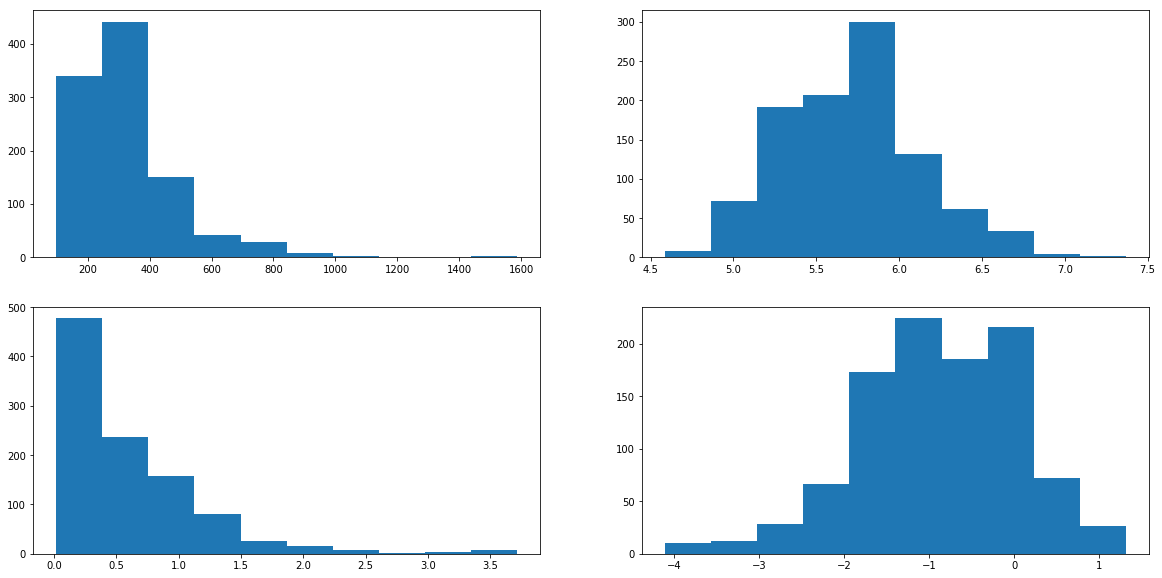

In [142]:
sqft = dsc['price_sqft']
lsqft = dsc['price_sqft'].apply(np.log)
dist = dsc['min_dist']
ldist = dsc['min_dist'].apply(np.log)


plt.figure(figsize=(20,10))

# sqft
plt.subplot(221)
# plt.ylim(0, 450)
# plt.title('Rated G', fontsize=14, fontweight='bold')
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Domestic Total ($mil)', fontsize=14)
plt.hist(sqft);

# lsqft
plt.subplot(222)
plt.hist(lsqft);

# dist
plt.subplot(223)
plt.hist(dist);

# ldist
plt.subplot(224)
plt.hist(ldist);

# sns.distplot(dsc['price_sqft'].apply(np.log))

In [22]:
#sns.pairplot(dsc, size = 1.2, aspect=1.5)

In [21]:
#sns.pairplot(ssc, size = 1.2, aspect=1.5)

In [120]:
# def remove_outliers(df, col):
    
#     q75, q25 = np.percentile(df[col], [75 ,25])
#     iqr = q75 - q25
    
#     df[col] = df[df[col] < 1.5*iqr]
    
#     return df

In [168]:
# new_dsc = dsc.copy()

# q75, q50, q25 = np.percentile(new_dsc['price_sqft'], [75, 50 ,25])
# iqr = q75 - q25
# iqr*1.5

172.21682732702033

In [6]:
# den_near = dsc[dsc['min_dist']>1.5]

# den_near

In [7]:
# x = den_near['min_dist']
# y = den_near['price_sqft']

# plt.scatter(x,y)

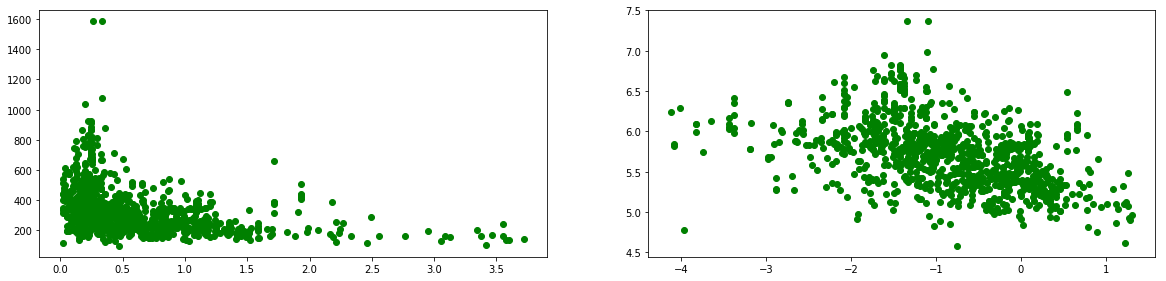

In [143]:
plt.figure(figsize=(20,10))


x = dsc['min_dist']
y = dsc['price_sqft']

plt.subplot(221)
# plt.ylim(0, 1000)
# plt.xlim(0, 4)
plt.plot(x, y, 'go');
# plt.title('Price/sqft. vs. Dist to Nearest Dispensary in Denver', fontsize=20, fontweight='bold')
# plt.ylabel('Price per sqft', fontsize=14, fontweight='bold')
# plt.xlabel('Minimum Distance in Miles', fontsize=14, fontweight='bold');


lx = dsc['min_dist'].apply(np.log)
ly = dsc['price_sqft'].apply(np.log)

plt.subplot(222)
# plt.ylim(0, 1000)
# plt.xlim(0, 4)
plt.plot(lx, ly, 'go');
# plt.title('Price/sqft. vs. Dist to Nearest Dispensary in Denver', fontsize=20, fontweight='bold')
# plt.ylabel('Price per sqft', fontsize=14, fontweight='bold')
# plt.xlabel('Minimum Distance in Miles', fontsize=14, fontweight='bold');

In [144]:
x = dsc['min_dist'].apply(np.log)
y = dsc['price_sqft'].apply(np.log)
x_reshape = x.reshape(-1,1)

linear = LinearRegression()
linear.fit(x_reshape, y)

/home/nate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
linear.score(x_reshape, y)

0.21139858986793481

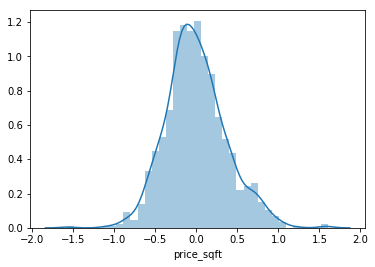

In [146]:
residuals_linear = y - linear.predict(x_reshape)
sns.distplot(residuals_linear);


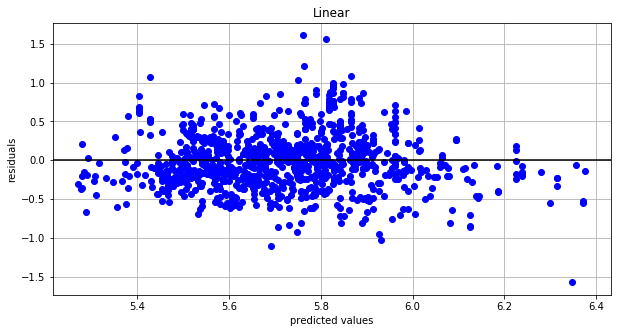

In [147]:
plt.figure(figsize=(10,5))
plt.plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')
plt.axhline(y=0, color='k')
plt.grid()
plt.title('Linear')
plt.xlabel('predicted values')
plt.ylabel('residuals');

In [5]:
# x = ssc['min_dist']
# y = ssc['price_sqft']

# plt.figure(figsize=(20,10))
# #plt.ylim(0, 450)
# plt.plot(x, y, 'go')
# plt.title('Price vs Distance in Seattle', fontsize=20, fontweight='bold')
# plt.ylabel('Price per sqft', fontsize=14, fontweight='bold')
# plt.xlabel('Minimum Distance in Miles', fontsize=14, fontweight='bold');

In [ ]:
x = dsc['min_dist']
y = dsc['price_sqft']

plt.figure(figsize=(20,10))
#plt.ylim(0, 450)
plt.plot(x, y, 'go')
plt.title('Price vs Distance in Denver', fontsize=20, fontweight='bold')
plt.ylabel('Price per sqft', fontsize=14, fontweight='bold')
plt.xlabel('Minimum Distance in Miles', fontsize=14, fontweight='bold');

In [11]:
dsc.head(5)

,full_address,home_price,beds,baths,house_sqft,lot_sqft,year_built,garage_type,yearly_tax,min_dist,price_sqft
0,"2322 Clarkson St, Denver, CO 80205",859000.0,3.0,4.0,3183.0,3125.0,1898.0,none,2292.0,0.239751,269.871191
1,"19472 E 59th Pl, Aurora, CO 80019",329900.0,2.0,3.0,1668.0,5700.0,2001.0,none,2412.0,1.510783,197.781775
2,"8552 E 49th Pl, Denver, CO 80238",600000.0,4.0,4.0,2854.0,3296.0,2013.0,none,4464.0,1.311372,210.231254
3,"1750 S Tennyson St, Denver, CO 80219",339900.0,3.0,2.0,2152.0,9740.0,1955.0,none,1668.0,0.689434,157.946097
4,"1000 S Jackson St, Denver, CO 80209",925000.0,4.0,3.0,3012.0,6250.0,1954.0,none,4428.0,0.775793,307.104914


In [27]:
def dist_bin(df, col):
    
    dist_bin = []
    
    for dist in df[col]:
        
        if dist < 0.5:
            dist_bin.append(0.25)
        elif dist < 1.0:
            dist_bin.append(0.75)
        elif dist < 1.5:
            dist_bin.append(1.25)
        elif dist < 2.0:
            dist_bin.append(1.75)
        elif dist < 2.5:
            dist_bin.append(2.25)
        elif dist < 3.0:
            dist_bin.append(2.75)
        elif dist < 3.5:
            dist_bin.append(3.25)
        else:
            dist_bin.append(3.75)
            
    df['dist_bin'] = dist_bin
    
    return df

In [149]:
new_dsc = dsc.copy()

In [150]:
new_dsc = dist_bin(new_dsc, 'min_dist')

In [151]:
bin_mean = new_dsc.groupby('dist_bin').mean()

bin_std = new_dsc.groupby('dist_bin').agg(np.std, ddof=1)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

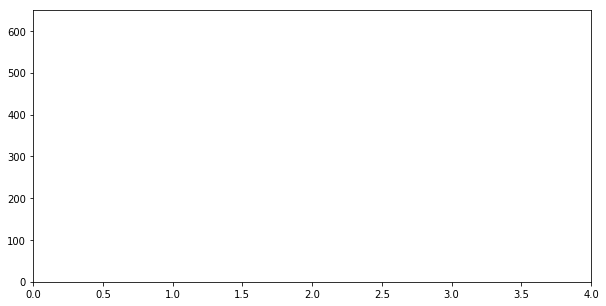

In [153]:
x = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75]
y = bin_mean['price_sqft']
yerr = bin_std['price_sqft']

plt.figure(figsize=(10,5))
plt.ylim(0, 650)
plt.xlim(0, 4)
plt.bar(x, y, width=0.25, color='k', yerr=yerr, error_kw=dict(elinewidth=3, ecolor='g', capsize=9))
plt.title('Price/sqft. vs. Dist to Nearest Dispensary in Denver', fontsize=20, fontweight='bold')
plt.ylabel('Price per sqft', fontsize=14, fontweight='bold')
plt.xlabel('Minimum Distance in Miles', fontsize=14, fontweight='bold');

In [155]:
X = np.array(dsc['min_dist'])
X = np.c_[np.ones(X.shape[0]), X]
y = np.array(dsc['price_sqft'])

In [140]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    xtx = np.dot(X.T, X) ## x-transpose times x
    inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
    xty = np.dot(X.T, y) ## x-transpose times y
    return np.dot(inv_xtx, xty)

In [156]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 320.6972484071133 | slope: -87.2288740833983


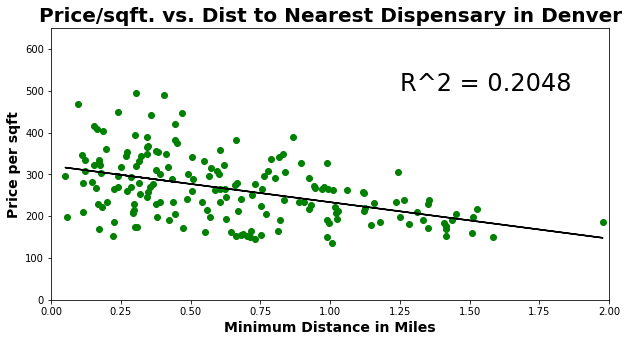

In [162]:
x = dsc['min_dist']
y = dsc['price_sqft']
abline = [params[1]*i + params[0] for i in x]

plt.figure(figsize=(10,5))
plt.ylim(0, 650)
plt.xlim(0, 2)
plt.plot(x, y, 'go', x, abline, 'k')
plt.title('Price/sqft. vs. Dist to Nearest Dispensary in Denver', fontsize=20, fontweight='bold')
plt.ylabel('Price per sqft', fontsize=14, fontweight='bold')
plt.xlabel('Minimum Distance in Miles', fontsize=14, fontweight='bold')
plt.text(1.25, 500, 'R^2 = 0.2048', fontsize=24);

In [50]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [51]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [148]:
X = np.array(dsc['min_dist'].apply(np.log)).reshape(-1,1)
y = dsc['price_sqft'].apply(np.log)

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     137.6904
sst:     174.6008
r^2:     0.2114
adj_r^2: 0.2106


# playing with scaler

In [150]:
dsc_copy = dsc.copy(deep=True)

In [74]:
# dsc_copy = dsc_copy[['min_dist', 'price_sqft']]

In [151]:
dsc_copy['min_dist'] = dsc_copy['min_dist'].apply(np.log)
dsc_copy['price_sqft'] = dsc_copy['price_sqft'].apply(np.log)

dsc_copy = dsc_copy[dsc_copy.beds != 19]
dsc_copy = dsc_copy[dsc_copy.year_built != 2019]

In [83]:
# scaler = preprocessing.MinMaxScaler()
# scaled_copy = scaler.fit_transform(dsc_copy)
# scaled_copy = pd.DataFrame(scaled_copy, columns=['min_dist', 'price_sqft'])

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

# ax1.set_title('Before Scaling')
# sns.kdeplot(dsc_copy['min_dist'], ax=ax1)
# sns.kdeplot(dsc_copy['price_sqft'], ax=ax1)

# ax2.set_title('After Scaling')
# sns.kdeplot(scaled_copy['min_dist'], ax=ax2)
# sns.kdeplot(scaled_copy['price_sqft'], ax=ax2)
# plt.show();

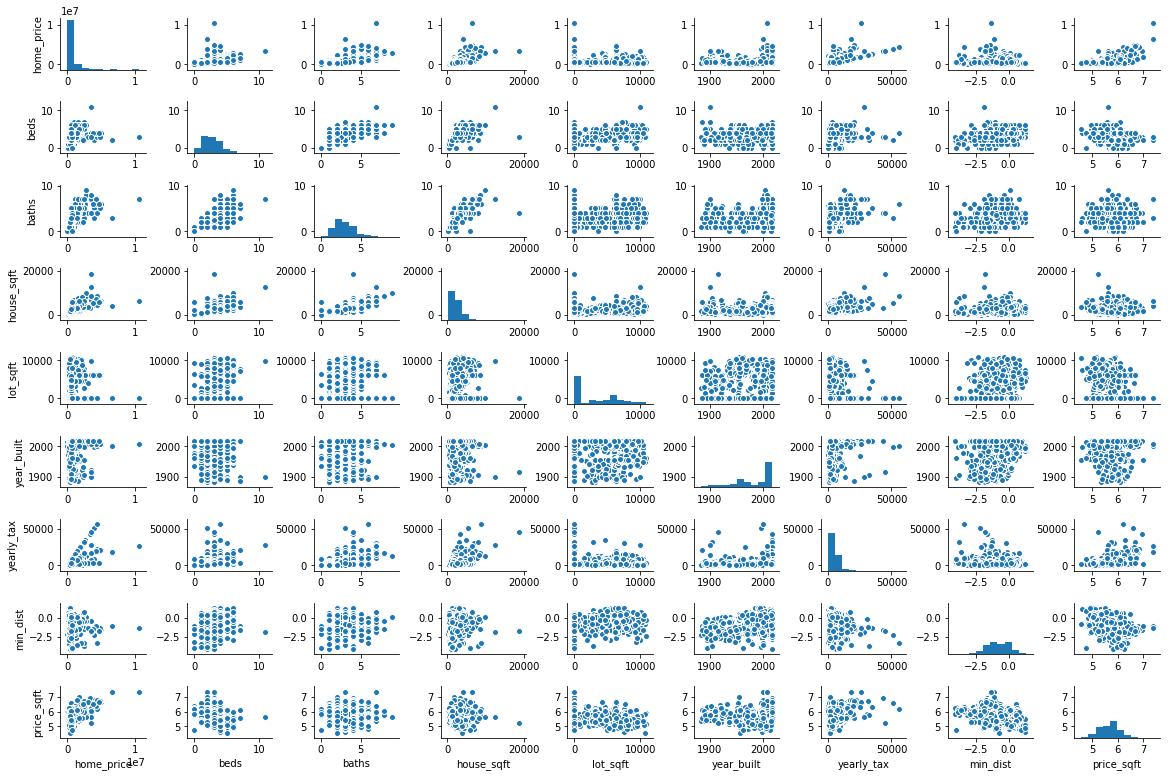

In [152]:
sns.pairplot(dsc_copy, size = 1.2, aspect=1.5);

In [153]:
x = np.array(dsc_copy['min_dist'])
y = np.array(dsc_copy['price_sqft'])
z = np.polyfit(x, y, 3)

In [154]:
p = np.poly1d(z)

In [158]:
xp = np.linspace(-4.113195, 1.313290, 990)

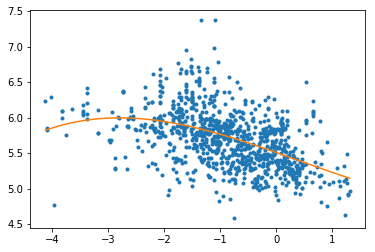

In [159]:
plt.plot(x, y, '.', xp, p(xp), '-');

In [157]:
dsc_copy.describe()

,home_price,beds,baths,house_sqft,lot_sqft,year_built,yearly_tax,min_dist,price_sqft
count,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,7.349253e+05,2.965657,2.787879,2359.643434,3090.795960,1982.617172,4851.901010,-0.872066,5.700244
std,6.979211e+05,1.287268,1.339851,1563.087665,3330.025511,36.899693,5276.896649,0.944889,0.399455
min,5.000000e+04,0.000000,0.000000,120.000000,0.000000,1884.000000,0.000000,-4.113195,4.585891
25%,4.084998e+05,2.000000,2.000000,1327.250000,0.000000,1955.000000,1536.000000,-1.485102,5.389720
50%,5.770000e+05,3.000000,3.000000,1959.500000,2280.000000,2000.000000,3168.000000,-0.839632,5.726125
75%,7.837500e+05,4.000000,4.000000,2968.000000,6250.000000,2017.000000,6849.000000,-0.147925,5.946801
max,1.047500e+07,11.000000,9.000000,18696.000000,10800.000000,2018.000000,56112.000000,1.313290,7.369829


In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly.fit(x.reshape(-1,1), y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

In [133]:
stats = Stats(x, y, poly)
pretty_print_stats(stats)

IndexError: tuple index out of range

# k-fold

In [176]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [177]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [220]:
data = dsc_copy['min_dist'].reshape(-1,1)
target = np.array(dsc_copy['price_sqft'])

K = 5
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

kf = KFold(n_splits=K, shuffle=True, random_state=42)

for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
        
        # split data
        X_train, X_val = data[train_index], data[val_index]
        y_train, y_val = target[train_index], target[val_index]

        # instantiate model
        poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))]) 
#         lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)

        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, poly)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha: 0.0001 | mean(train_error):  0.1214 | mean(val_error): 0.1236
alpha:  0.001 | mean(train_error):  0.1214 | mean(val_error): 0.1236
alpha:   0.01 | mean(train_error):  0.1214 | mean(val_error): 0.1236
alpha:    0.1 | mean(train_error):  0.1214 | mean(val_error): 0.1236
alpha:      1 | mean(train_error):  0.1214 | mean(val_error): 0.1236
alpha:   10.0 | mean(train_error):  0.1214 | mean(val_error): 0.1236


/home/nate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [202]:
dsc_copy[75:80]

,full_address,home_price,beds,baths,house_sqft,lot_sqft,year_built,garage_type,yearly_tax,min_dist,price_sqft
76,"4710 Stuart St, Denver, CO 80212",449900.0,3.0,2.0,1501.0,6250.0,1951.0,none,1788.0,-0.507657,5.702894
77,"1085 S Harrison St, Denver, CO 80209",536500.0,3.0,2.0,1377.0,6250.0,1951.0,none,1560.0,-0.140701,5.965159
78,"4421 W Tennessee Ave, Denver, CO 80219",260000.0,2.0,1.0,762.0,0.0,1963.0,none,1284.0,-1.339457,5.832490
79,"8710 Galen Ct, Denver, CO 80229",379900.0,5.0,3.0,2100.0,8750.0,1957.0,none,1380.0,0.249033,5.197971
80,"2591 S Columbine St, Denver, CO 80210",2399000.0,5.0,7.0,6873.0,7500.0,2018.0,none,30948.0,-0.184080,5.855207


In [205]:
np.where(np.isnan(target))

(array([], dtype=int64),)